<a href="https://colab.research.google.com/github/singhsukhendra/QuaternionCNN/blob/master/breast_cancer_histology_images1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!gdown https://drive.google.com/uc?id=107Qo3Fs_pdzByrOMpet4w8G0uNle2ooN

import zipfile
with zipfile.ZipFile("complexnn.zip","r") as zip_ref:
    zip_ref.extractall()

Downloading...
From: https://drive.google.com/uc?id=107Qo3Fs_pdzByrOMpet4w8G0uNle2ooN
To: /content/complexnn.zip
100% 12.6k/12.6k [00:00<00:00, 27.9MB/s]


In [0]:
import pandas as pd
import numpy as np
import os

from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!gdown https://drive.google.com/uc?id=1tFoQJrwtMYCBMG0WH6unek9dc2sjfQZ4

import zipfile
with zipfile.ZipFile("breast-histopathology-images.zip","r") as zip_ref:
    zip_ref.extractall("breast-histopathology-images")

Downloading...
From: https://drive.google.com/uc?id=1tFoQJrwtMYCBMG0WH6unek9dc2sjfQZ4
To: /content/breast-histopathology-images.zip
3.33GB [00:53, 62.4MB/s]


In [0]:
imagePatches = glob('breast-histopathology-images/**/*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

breast-histopathology-images/9261/1/9261_idx5_x1801_y1201_class1.png
breast-histopathology-images/9261/1/9261_idx5_x2501_y1401_class1.png
breast-histopathology-images/9261/1/9261_idx5_x1451_y851_class1.png
breast-histopathology-images/9261/1/9261_idx5_x1701_y1401_class1.png
breast-histopathology-images/9261/1/9261_idx5_x1751_y1401_class1.png
breast-histopathology-images/9261/1/9261_idx5_x1001_y951_class1.png
breast-histopathology-images/9261/1/9261_idx5_x2301_y1701_class1.png
breast-histopathology-images/9261/1/9261_idx5_x1901_y1201_class1.png
breast-histopathology-images/9261/1/9261_idx5_x2651_y1651_class1.png
breast-histopathology-images/9261/1/9261_idx5_x1951_y1101_class1.png


In [0]:
patternZero = '*class0.png'
patternOne = '*class1.png'
classZero = fnmatch.filter(imagePatches, patternZero)
classOne = fnmatch.filter(imagePatches, patternOne)
print("IDC(-)\n\n",classZero[0:5],'\n')
print("IDC(+)\n\n",classOne[0:5])

IDC(-)

 ['breast-histopathology-images/9261/0/9261_idx5_x1951_y851_class0.png', 'breast-histopathology-images/9261/0/9261_idx5_x701_y751_class0.png', 'breast-histopathology-images/9261/0/9261_idx5_x2051_y851_class0.png', 'breast-histopathology-images/9261/0/9261_idx5_x2701_y1601_class0.png', 'breast-histopathology-images/9261/0/9261_idx5_x2601_y1201_class0.png'] 

IDC(+)

 ['breast-histopathology-images/9261/1/9261_idx5_x1801_y1201_class1.png', 'breast-histopathology-images/9261/1/9261_idx5_x2501_y1401_class1.png', 'breast-histopathology-images/9261/1/9261_idx5_x1451_y851_class1.png', 'breast-histopathology-images/9261/1/9261_idx5_x1701_y1401_class1.png', 'breast-histopathology-images/9261/1/9261_idx5_x1751_y1401_class1.png']


In [0]:
X=[]
y=[]

for u in classZero:
  X.append(u)
  y.append(0)

for u in classOne:
  X.append(u)
  y.append(1)



In [0]:
df = pd.DataFrame()
df["images"]=X
df["labels"]=y
df=df.sample(frac=1)

In [0]:
def RgbToQuaternion(img):
 b,g,r = cv2.split(img)

 M=np.zeros((50,50,4))
 M[:,:,1]=r
 M[:,:,2]=g
 M[:,:,3]=b
 return(np.array(M))


In [0]:
def batch_generator(df,batch_size,steps):
 idx=1
 while True: 
  yield load_data(df,idx-1,batch_size)## Yields data
  if idx < steps:
    idx+=1
  else:
    idx=1

In [0]:
def load_data(df,idx,batch_size):
 start=idx*batch_size
 end=(idx+1)*batch_size
 x = []
 y = [] 
 for  row  in df.values[start:end,:]:
  img=row[0]

  full_size_image = cv2.imread(img)
  X=cv2.resize(full_size_image, (50,50), interpolation=cv2.INTER_CUBIC)

  image = RgbToQuaternion(X) /255.
  x.append(image) 
  y.append(row[-1] )

 return (np.array(x).reshape(-1,50,50,4), np.array(y).reshape(-1))

In [0]:

df_train, df_test = train_test_split(df, test_size=0.3)


In [0]:
train_batch_generator = batch_generator(df_train, 64,len(df_train)//64)
test_batch_generator = batch_generator(df_test, 64,len(df_train)//64)

In [0]:
from   complexnn                             import *
import keras
from   keras.layers                          import *
from   keras.models                          import Model
import keras.backend                         as     K
import numpy                                 as     np

Using TensorFlow backend.


In [0]:


from keras.optimizers import adam
opt = adam(lr = 0.001,decay=1e-6)

In [0]:
input_seq = Input((50, 50, 4))
O    =QuaternionConv2D(64, (3,3),activation='relu',padding='same')(input_seq)  
O    = MaxPooling2D((2,2), padding='same')(O)

O    =QuaternionConv2D(128, (3,3),activation='relu',padding='same')(input_seq)  
O    = MaxPooling2D((2,2), padding='same')(O)

O    =QuaternionConv2D(256, (3,3),activation='relu',padding='same')(input_seq)  
O    = MaxPooling2D((2,2), padding='same')(O)

O    = Flatten()(O)

O  = QuaternionDense(256, activation='relu')(O)
            
O = Dense(1, activation='sigmoid')(O)
model=Model(input_seq, O)
            
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
            
            

In [20]:
from keras.callbacks import TensorBoard  

logdir = "logs/"
tensorboard_callback = TensorBoard(log_dir=logdir)




history =model.fit_generator(batch_generator(df_train, 128,len(df_train)//128),\
                    steps_per_epoch=len(df_train)//128,epochs=18,\
                    verbose=1,validation_data=batch_generator(df_test, 64,len(df_test)//64),validation_steps=len(df_test)//64)

Epoch 1/18
3035/3035 [==============================] - 803s 265ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.4173 - val_accuracy: 0.9185
Epoch 2/18
3035/3035 [==============================] - 792s 261ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.5217 - val_accuracy: 0.9225
Epoch 3/18
3035/3035 [==============================] - 800s 264ms/step - loss: 0.0149 - accuracy: 0.9957 - val_loss: 0.4158 - val_accuracy: 0.9250
Epoch 4/18
3035/3035 [==============================] - 795s 262ms/step - loss: 0.0160 - accuracy: 0.9962 - val_loss: 0.4554 - val_accuracy: 0.9286
Epoch 5/18
3035/3035 [==============================] - 795s 262ms/step - loss: 0.0124 - accuracy: 0.9966 - val_loss: 0.2765 - val_accuracy: 0.9296
Epoch 6/18
3035/3035 [==============================] - 797s 263ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.2294 - val_accuracy: 0.9258
Epoch 7/18
3035/3035 [==============================] - 796s 262ms/step - loss: 0.0110 - accuracy: 0.9967 - val_

In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 4)         0         
_________________________________________________________________
quaternion_conv2d_3 (Quatern (None, 50, 50, 1024)      10240     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 1024)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 640000)            0         
_________________________________________________________________
quaternion_dense_1 (Quaterni (None, 256)               40960256  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 40,970,753
Trainable params: 40,970,753
Non-trainable params: 0
_______________________________________________

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


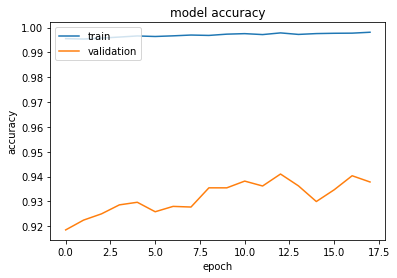

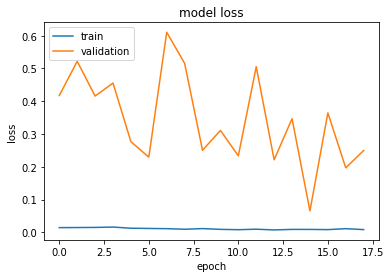

In [30]:
# tensorboard logs 
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [24]:
for layer in model.layers:
    print(layer.name)

input_1
quaternion_conv2d_3
max_pooling2d_3
flatten_1
quaternion_dense_1
dense_1


In [38]:



history.history

{'accuracy': [0.9955236,
  0.9953588,
  0.9957424,
  0.99616194,
  0.9966073,
  0.99639106,
  0.99665105,
  0.9969728,
  0.9968209,
  0.9973306,
  0.99753654,
  0.99716073,
  0.99783516,
  0.9972251,
  0.9975597,
  0.9976833,
  0.99773216,
  0.9981003],
 'loss': [0.014231665225926237,
  0.014520826881472942,
  0.014859979969388065,
  0.01596550633257601,
  0.012408542831890463,
  0.011713207289787976,
  0.011045398794662887,
  0.009288341226130536,
  0.011250404633053837,
  0.008954382407725269,
  0.007952727437518669,
  0.009413306093357837,
  0.007258205408077665,
  0.008833427567273639,
  0.008775845878650783,
  0.008182953418969878,
  0.01107004956675979,
  0.00823284449638425],
 'val_accuracy': [0.9185048937797546,
  0.9224576950073242,
  0.9249687790870667,
  0.9285911917686462,
  0.9296364188194275,
  0.9258217811584473,
  0.9279783964157104,
  0.9277201294898987,
  0.9354515075683594,
  0.9354454874992371,
  0.93816077709198,
  0.9361904263496399,
  0.9410082697868347,
  0.9362

In [39]:
history.history['val_accuracy']

[0.9185048937797546,
 0.9224576950073242,
 0.9249687790870667,
 0.9285911917686462,
 0.9296364188194275,
 0.9258217811584473,
 0.9279783964157104,
 0.9277201294898987,
 0.9354515075683594,
 0.9354454874992371,
 0.93816077709198,
 0.9361904263496399,
 0.9410082697868347,
 0.9362505078315735,
 0.9299368262290955,
 0.9346765875816345,
 0.9403174519538879,
 0.9378063678741455]

<Figure size 432x288 with 0 Axes>

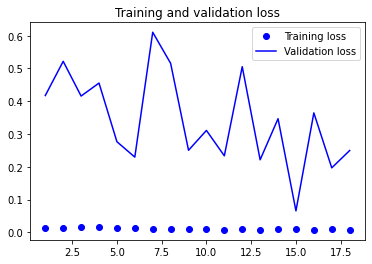

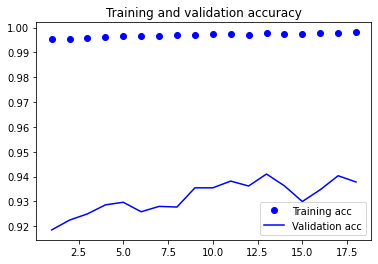

<Figure size 432x288 with 0 Axes>

In [41]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [29]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

NameError: ignored